<a href="https://colab.research.google.com/github/ambideXtrous9/Machine-Learning-Assignments/blob/main/214161006_214161011_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE 527 Machine Learning Lab
# Assignment 03
-----------------------------------------
214161006 Pathak Sanchit Vivekanand

214161011 Sushovan Saha

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
from matplotlib.offsetbox import AnchoredText

## Q1. Write the following function in python to generate n number of points around the line $y = ax + b$

<center>$[y_{outlier}, y_{noisy}, y_{actual}] = generateDataSet(a, b, x_{min}, x_{max}, n, \alpha, \sigma)$</center>

where $x$ $\epsilon$ $[x_{min}, x_{max}] , \sigma$ is the standard deviation of additive white noise  and \alpha is the fraction of outliers present in the data $(\alpha$ $\epsilon$ $(0, 1))$. The output of the function is obtained as follows:

<center>
$y_{actual}(i) = ax(i) + b$

$y_{noisy}(i) = y_{actual}(i) + \sigma N(0, 1)$

$y_{outlier} = outlierCorruption(y_{noisy}, \alpha)$
</center>

Display the scatter plot of the dataset. Plot the inliers in BLUE and outliers in RED.


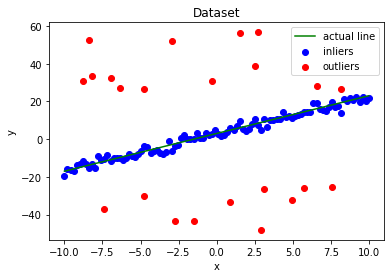

In [ ]:
def generateDataSet(a, b, xmin, xmax, n, alpha, sigma):

  #generate x_axis of size (n)
  x = np.linspace(xmin, xmax, num=n)
  
  #generate y_actual of size (n)
  y_actual = a*x + b

  #generate y_noisy of size (n)
  y_noisy = y_actual + sigma * np.random.standard_normal(size=n)

  #generate y_outlier of size (alpha*n)
  y_outlier, idx_outlier = outlierCorruption(y_noisy, alpha)
  #x_outlier = x[idx_outlier]

  return x, y_actual, y_noisy, y_outlier, idx_outlier

def outlierCorruption(y_noisy, alpha):
  n = y_noisy.shape[0]

  #no of outliers rounded to nearest integer
  n_outlier = round(alpha*n)

  #generate random indices that will be converted into an outlier
  idx_outlier = np.random.randint(low=0, high=n, size=(n_outlier))
  
  #get mean & std dev
  y_mean = np.mean(y_noisy)
  y_sd = np.std(y_noisy)

  #say outlier be atleast 2.5 SDs away
  y_outlier = y_mean + np.random.choice([-1, 1], size=(n_outlier))*np.random.uniform(low=2, high=5, size=(n_outlier))*y_sd

  return y_outlier, idx_outlier


#We take consider parameters same as Assignment 02
x, y_actual, y_noisy, y_outlier, idx_outlier = generateDataSet(a=2, b=3, n=100, xmin=-10, xmax=10, alpha=0.229, sigma=2)

#plot the dataset
plt.plot(x, y_actual, 'g')
plt.scatter(x, y_noisy, color='blue')
plt.scatter(x[idx_outlier], y_outlier, color='red')
plt.title("Dataset")
plt.legend(['actual line', 'inliers', 'outliers'], loc='best')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

y = y_noisy
y[idx_outlier] = y_outlier

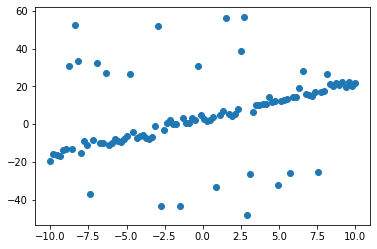

In [ ]:
plt.scatter(x,y)

## Q2. Perform Regression Diagnostics and display the line obtained in each iteration. Please note that the outliers detected in each iteration should be marked in red color. Experiment with different values of $\alpha$.

In [ ]:
def datagen_alpha(alpha=0.1):
  x, y_actual, y_noisy, y_outlier, idx_outlier = generateDataSet(a=2, b=3, n=100, xmin=-10, xmax=10, alpha=alpha, sigma=2)
  y = y_noisy
  y[idx_outlier] = y_outlier
  return x,y

def COEF_INCEP(x,y):
  X = x.reshape(-1, 1)
  Y = y
  reg = LinearRegression().fit(X, Y)
  a = reg.coef_[0]
  b = reg.intercept_
  return a,b 

def regression_diag(x,y,r,axs,p,q):
 
  a,b = COEF_INCEP(x,y)
  
  X = x
  pred = a*x + b
  error_term = y-pred
  e_mean = np.mean(error_term)
  e_std = np.std(error_term)

  n = len(x)
  keep = np.ones(n, dtype=bool)
  L = 0
  
  
  for i in range(0,len(x)):
    if (abs(error_term[i])> e_mean+r*e_std):
      keep[i] = False 
      L += 1 
  
  s = "INTERCEP = {:.2f}\n COEF = {:.2f}\n LEN X = {}\n OUTLIERS = {}\n".format(b,a,n,L) 
  
  X_out = x[~keep] 
  Y_out = y[~keep]

     
  x = x[keep]
  y = y[keep]


  axs[p][q].plot(X, pred, '-g',linewidth=3)
  axs[p][q].scatter(x, y, color='blue')
  axs[p][q].scatter(X_out, Y_out, color='red')
  axs[p][q].legend(['actual line', 'inliers', 'outliers'], loc=2)
  axs[p][q].set_xlabel("x")
  axs[p][q].set_ylabel("y")
  axs[p][q].add_artist(AnchoredText(s, loc=4))
  
  return x,y

def reg_solverUtil(alpha,sd,k):
  x,y = datagen_alpha(alpha)
  PLOTS_PER_ROW = 2
  i,j=0,0
  s = r"$\alpha = {}$".format(alpha)
  fig, axs = plt.subplots(math.ceil(k/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 20))
  fig.suptitle(s,fontsize=30)
  for c in range(0,k):
    x,y = regression_diag(x,y,sd,axs,i,j)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
  plt.show()


def Solve(alpha_min=0.1,alpha_max=0.2,sd=3,k=10):
  alpha = np.linspace(alpha_min,alpha_max,5)
  for i in alpha:
    reg_solverUtil(i,sd,k)
    print("--------------------------------------------------------")

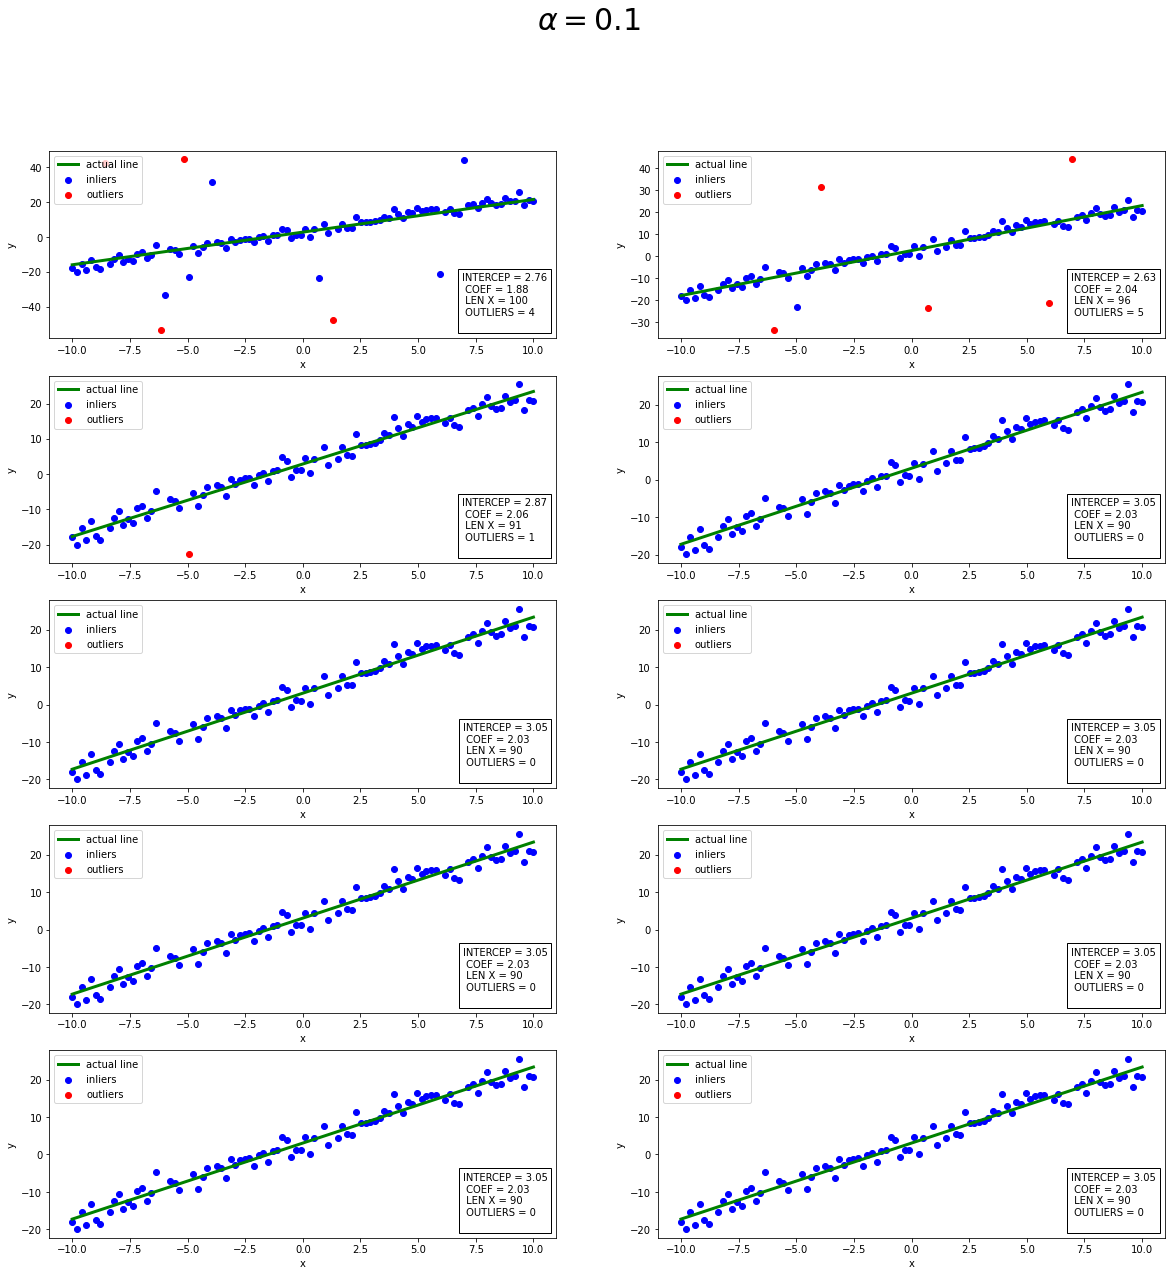

--------------------------------------------------------


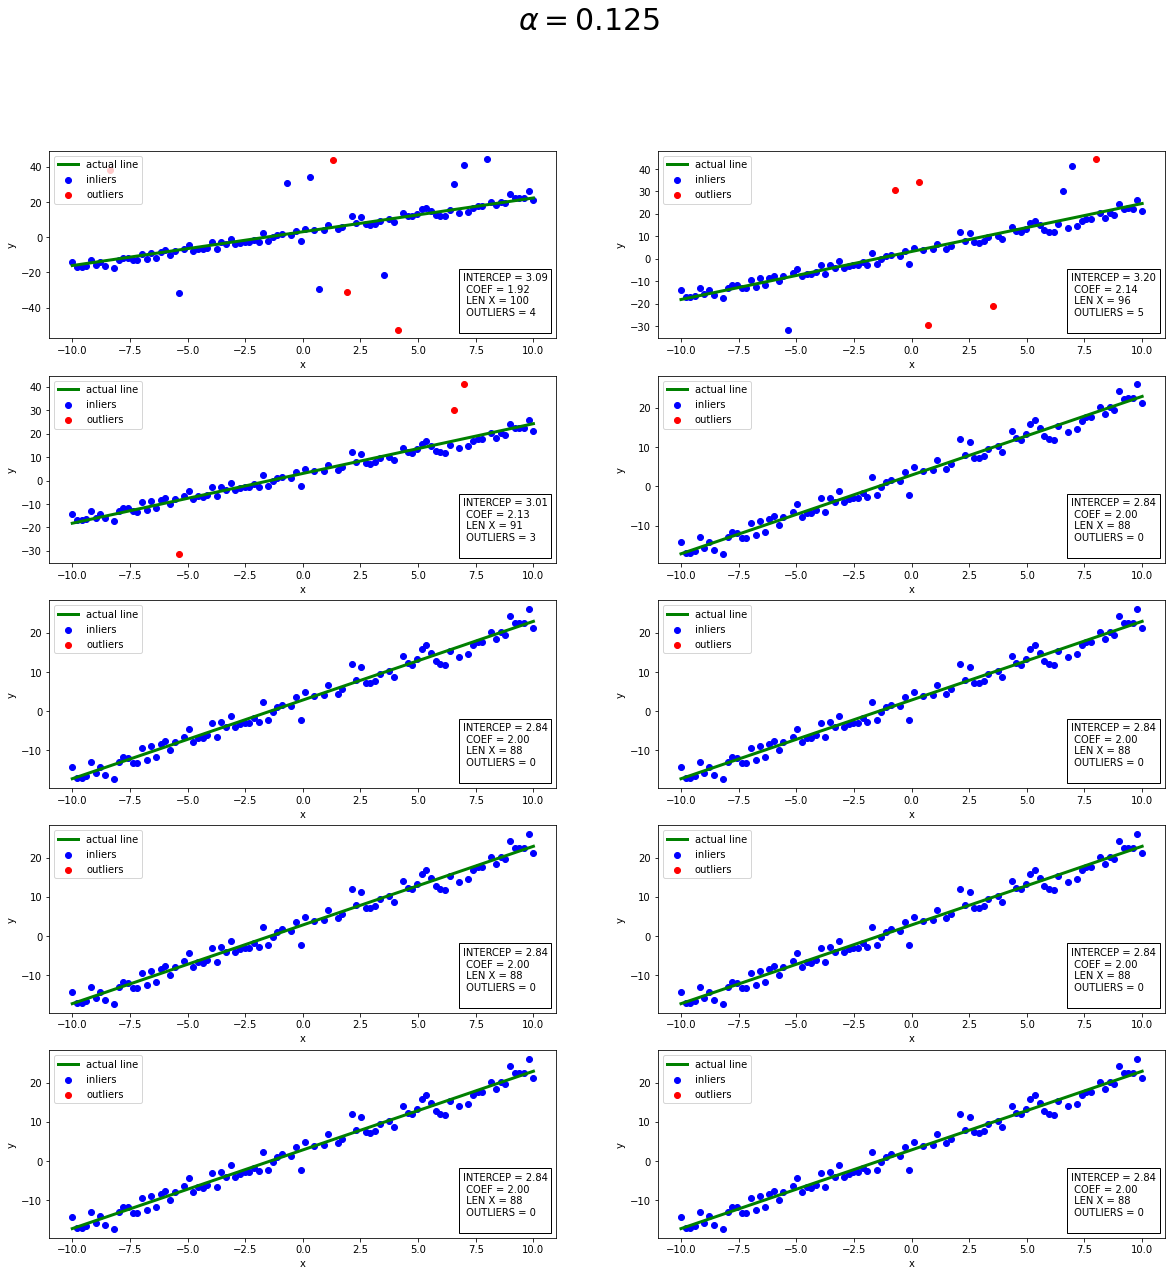

--------------------------------------------------------


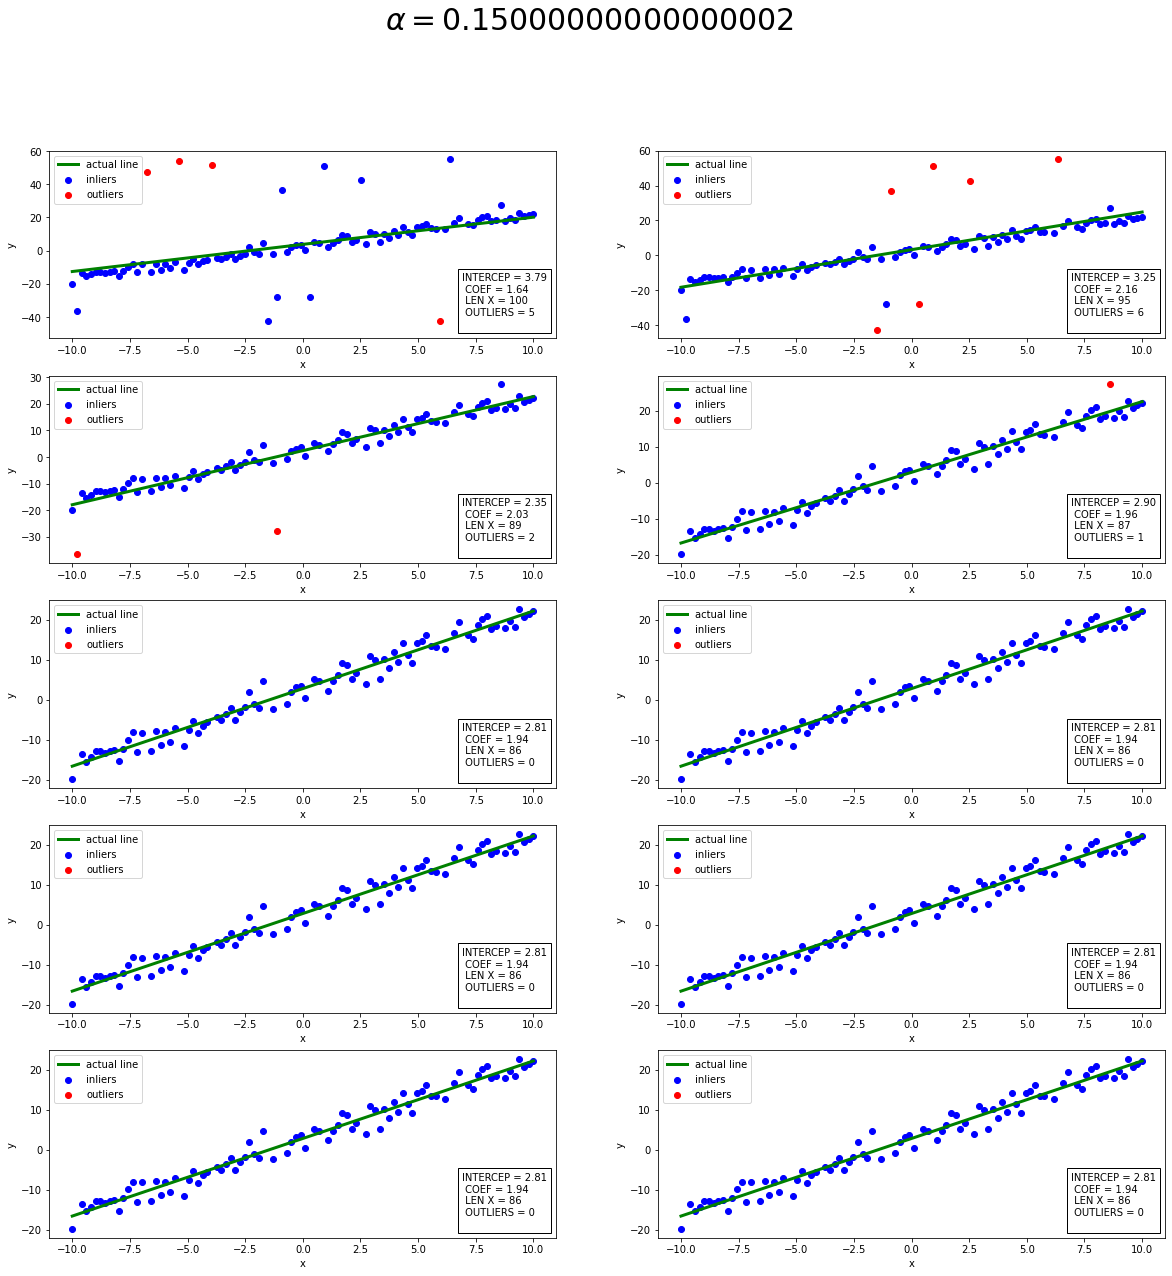

--------------------------------------------------------


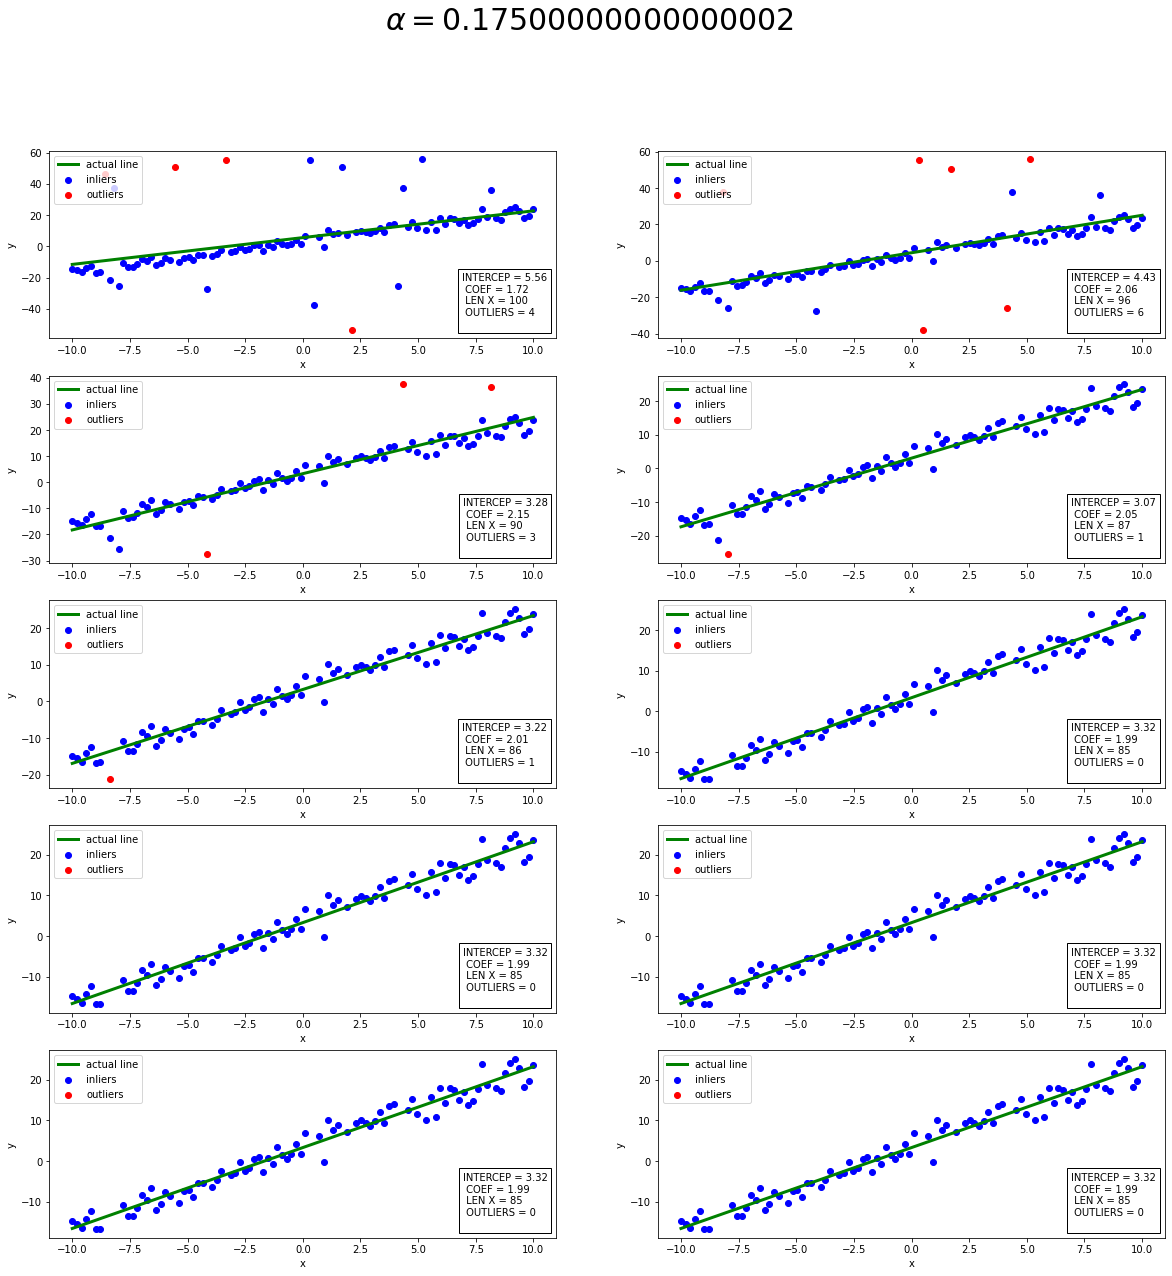

--------------------------------------------------------


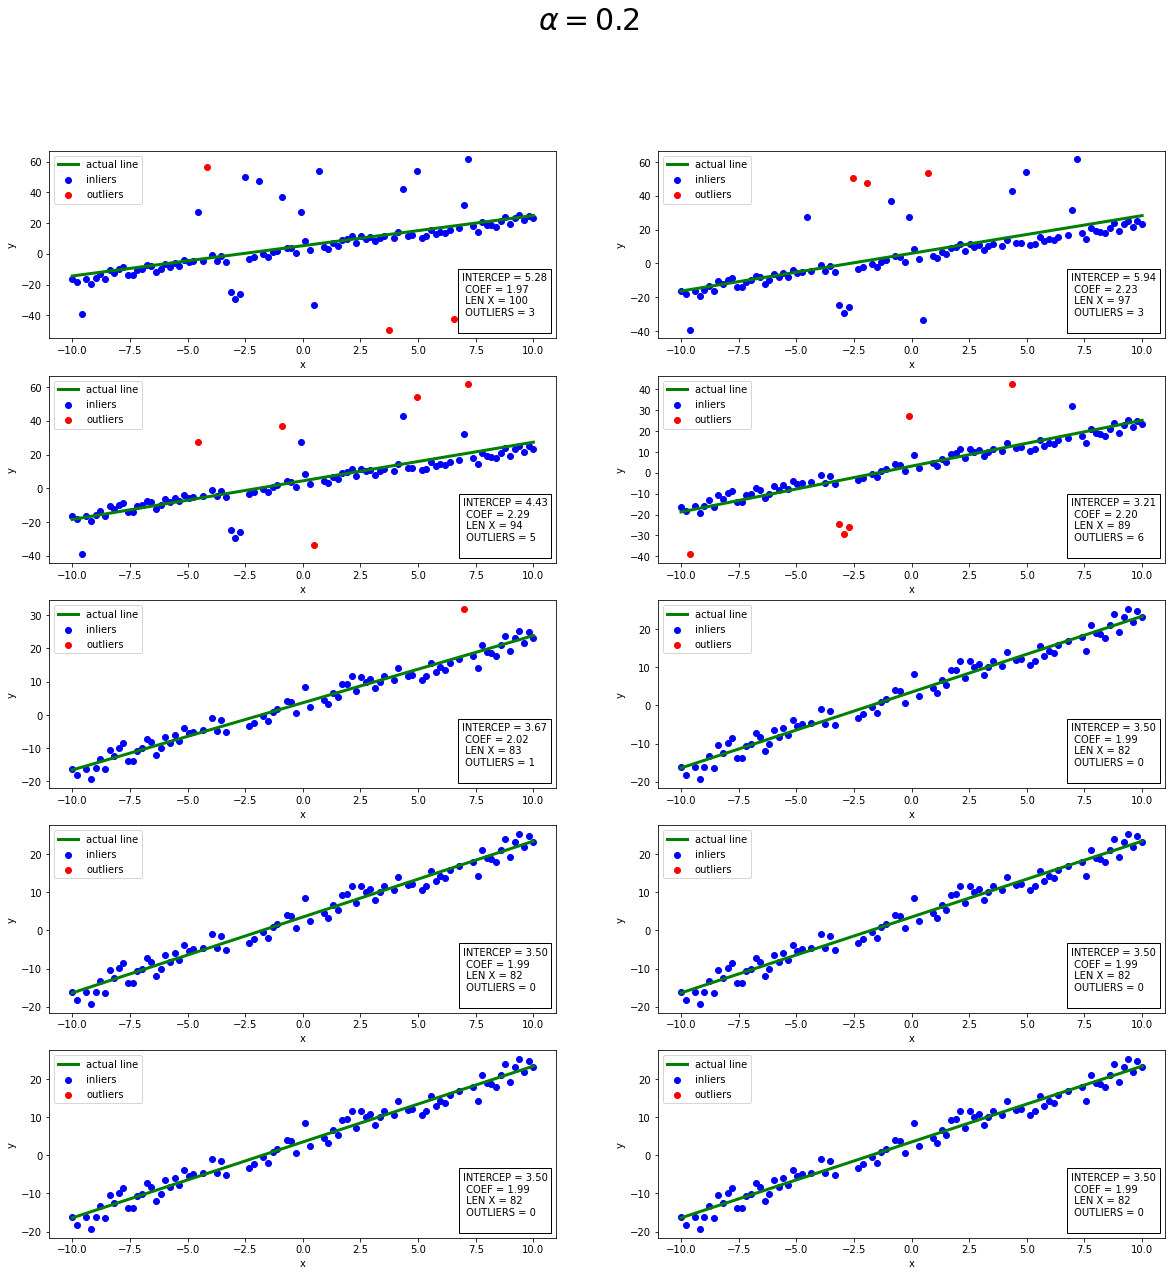

--------------------------------------------------------


In [ ]:
Solve()

## Q3. Perform RANSAC on the above set of points and plot the output of each trial. Identify and plot the final line.

In [ ]:
def computeLine(x1,x2,y1,y2):
  '''Computes slope & intercept using 2-point form of line'''
  #slope
  a = (y1-y2)/(x1-x2)
  #intercept
  b = y1 - (a*x1)
  return a,b

def getScore(x, y, a, b, thres=0.5):
  '''Computes score of the sample'''
  #compute perpendicular distance of line from ALL points
  dist = np.abs(a*x-y+b)/math.sqrt(a**2 + 1)
  #check points with threshold (True -> inlier, False -> outlier)
  in_pts = dist<thres
  x_in = x[in_pts]
  #score = no of inliers
  score = x_in.shape[0]
  return in_pts, score

def ransac(x, y, e=0.23, s=2, p=0.999, thres=0.5):
  '''Computes ransac'''

  #best score & corresponding model
  best_score = 0
  best_model = np.zeros((x.shape[0]), dtype=bool)

  #compute max iterations
  MAX_ITER = int(np.round(np.log(1-p)/np.log(1-((1-e)**s))))
  #print(MAX_ITER)

  PLOTS_PER_ROW = 2
  p,q=0,0
  s = "RANSAC ITR = {}".format(MAX_ITER)
  fig, axs = plt.subplots(math.ceil(MAX_ITER/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 20))
  fig.suptitle(s,fontsize=30)
  

  for i in range(MAX_ITER):
    
    #randomly select s points
    idx = np.random.choice(range(x.shape[0]), size=(2)) 
    xpts = x[idx]
    ypts = y[idx]

    #compute line
    a,b = computeLine(xpts[0], xpts[1], ypts[0], ypts[1])

    #get score
    in_pts, curr_score = getScore(x, y, a, b, thres=thres)
    #print(curr_score)

    #update best model
    if curr_score >= best_score:
      best_score = curr_score
      best_model = in_pts
      a_best = a
      b_best = b

    s = "SCORE = {}".format(curr_score)


    axs[p][q].plot(xpts, ypts, 'green',linewidth=3)
    axs[p][q].scatter(x[in_pts], y[in_pts], color='blue')
    axs[p][q].scatter(x[~in_pts], y[~in_pts], color='red')
    axs[p][q].legend(['actual line', 'inliers', 'outliers'], loc=2)
    axs[p][q].set_xlabel("x")
    axs[p][q].set_ylabel("y")
    axs[p][q].add_artist(AnchoredText(s, loc=4))


    q+=1
    if q%PLOTS_PER_ROW==0:
        p+=1
        q=0

  plt.show()
  return a_best,b_best,best_score, best_model

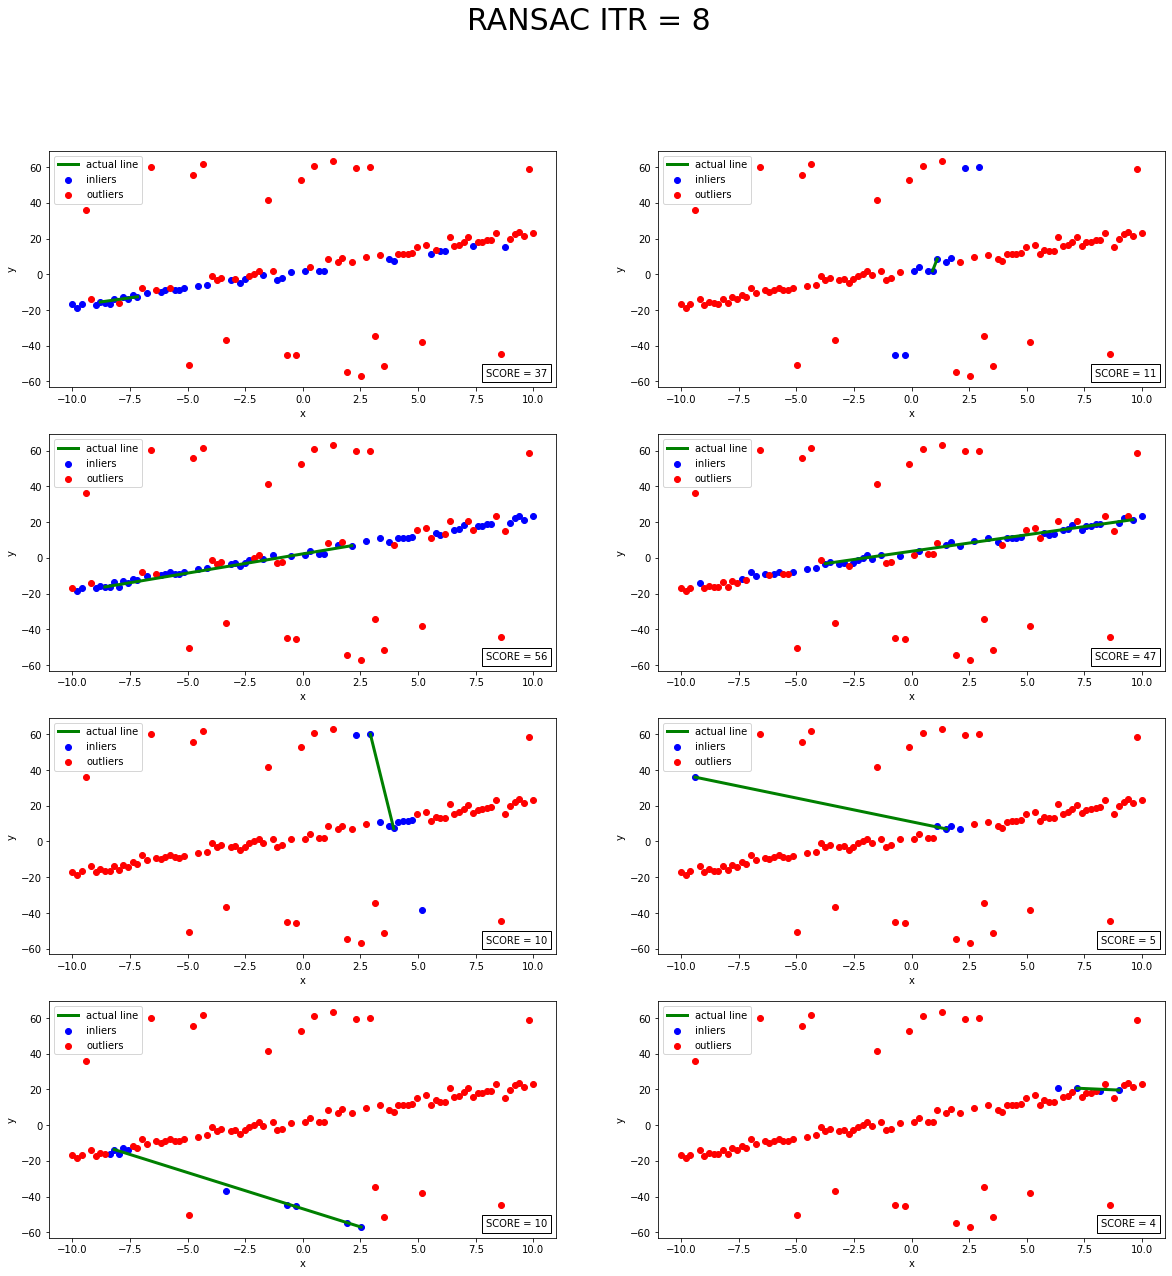

best=  56


Text(0.5, 1.0, 'BEST LINE')

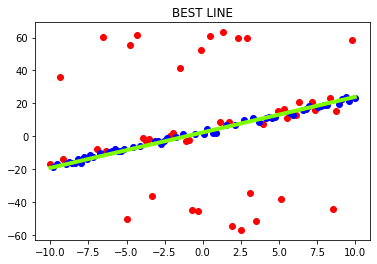

In [ ]:
x,y = datagen_alpha(alpha=0.229)
a_best,b_best,best_score, best_model = ransac(x, y, thres=1)

print("best= ", best_score)
plt.figure()
plt.scatter(x[~best_model], y[~best_model], color='red')
plt.scatter(x[best_model], y[best_model], color='blue')
plt.plot(x, a_best*x+b_best, color='chartreuse',linewidth=4)
plt.title("BEST LINE")